In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exploratory Data Analysis (EDA)**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/R_Data')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/R_Data"))
file_count = len(files)
#print(file_count)

['Split_data_inception_V3', 'Inception_v3.hdf5', 'Split_data_CNN', 'Split_data_inception_V3_1', 'Split_data_vgg16', 'Bengin cases', 'Malignant cases']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/R_Data'
base_dir = '/content/drive/MyDrive/R_Data/Split_data_vgg16_o/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [ ]:
#Under train folder create two folders 

train_cloud_dir = os.path.join(train_dir, 'Bengin cases')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'Malignant cases')
os.mkdir(train_foggy_dir)

In [ ]:
#Under validation folder create five folders 

validation_cloud_dir = os.path.join(validation_dir, 'Bengin cases')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'Malignant cases')
os.mkdir(validation_foggy_dir)

In [ ]:
import os
import random
from shutil import copyfile

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
BENGIN_SOURCE_DIR = '/content/drive/MyDrive/R_Data/Bengin cases/'
TRAINING_BENGIN_DIR = '/content/drive/MyDrive/R_Data/Split_data_vgg16_o/train/Bengin cases/'
VALID_BENGIN_DIR = '/content/drive/MyDrive/R_Data/Split_data_vgg16_o/validation/Bengin cases/'

MALIGNANT_SOURCE_DIR = '/content/drive/MyDrive/R_Data/Malignant cases/'
TRAINING_MALIGNANT_DIR = '/content/drive/MyDrive/R_Data/Split_data_vgg16_o/train/Malignant cases/'
VALID_MALIGNANT_DIR = '/content/drive/MyDrive/R_Data/Split_data_vgg16_o/validation/Malignant cases/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .70

split_data(BENGIN_SOURCE_DIR, TRAINING_BENGIN_DIR, VALID_BENGIN_DIR, split_size)
split_data(MALIGNANT_SOURCE_DIR, TRAINING_MALIGNANT_DIR, VALID_MALIGNANT_DIR, split_size)

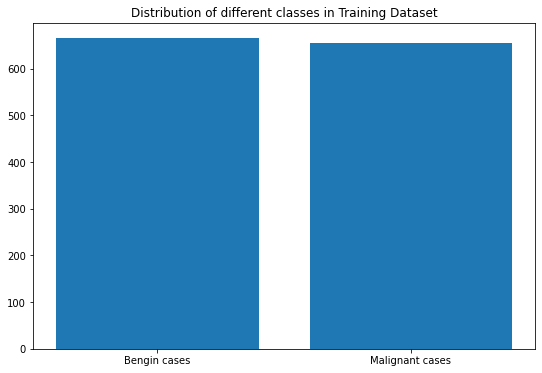

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Bengin cases', 'Malignant cases']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/R_Data/Split_data_vgg16_o/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['Bengin cases', 'Malignant cases']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/R_Data/Split_data_vgg16_o/train/'+i+'/'))))

Training Bengin cases images are: 665
Training Malignant cases images are: 655


In [ ]:
for i in ['Bengin cases', 'Malignant cases']:
    print('Testing {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/R_Data/Split_data_vgg16_o/validation/'+i+'/'))))

Testing Bengin cases images are: 286
Testing Malignant cases images are: 281


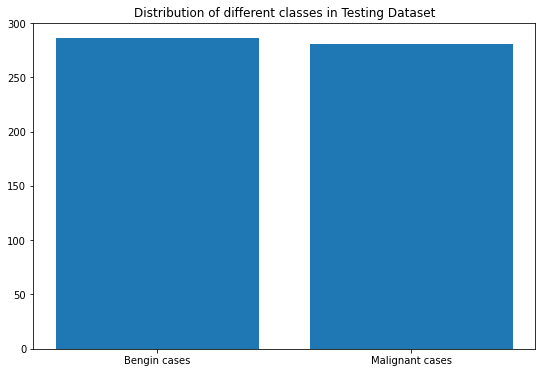

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Bengin cases', 'Malignant cases']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/R_Data/Split_data_vgg16_o/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.show()

In [ ]:
!pip install tensorflow==2.7.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import sequential
from tensorflow.keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=8,
                                   zoom_range=0.15,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.10,
                                   horizontal_flip=True,
                                   brightness_range=[0.8,1.2],
                                   channel_shift_range=0.15,
                                   fill_mode="nearest")

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/R_Data/Split_data_vgg16_o/train',target_size=(224,224),batch_size=32,class_mode='binary')

x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/R_Data/Split_data_vgg16_o/validation',target_size=(224,224),batch_size=32,class_mode='binary')

print(x_train.class_indices)
print(x_test.class_indices)

Found 767 images belonging to 2 classes.
Found 330 images belonging to 2 classes.
{'Bengin cases': 0, 'Malignant cases': 1}
{'Bengin cases': 0, 'Malignant cases': 1}


In [ ]:
from keras.layers.convolutional import Convolution2DTranspose
from keras.models import Sequential

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model=VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')# leave out of the last fully connected layer

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
x=layers.Flatten()(base_model.output)
x=layers.Dense(512,activation='relu')(x)

x=layers.Dropout(0.5)(x)
x=layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.models.Model(base_model.input,x)
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
TRAIN_COUNT =len(x_train.filepaths)
TEST_COUNT=len(x_test.filepaths)
TRAIN_STEPS_PER_EPOCH= round(TRAIN_COUNT/32)
VAL_STEPS_PER_EPOCH = round(TEST_COUNT/32)

In [ ]:
print(f"TRAIN_STEPS_PER_EPOCH:{TRAIN_STEPS_PER_EPOCH}")
print(f"VAL_STEPS_PER_EPOCH:{VAL_STEPS_PER_EPOCH}")

TRAIN_STEPS_PER_EPOCH:24
VAL_STEPS_PER_EPOCH:10


In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping,ModelCheckpoint
EARLY_STOP_PATIENCE =5

In [ ]:
cb_early_stopper =EarlyStopping(monitor='val_losss',patience=EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath='best.hdf5',monitor='val_loss',save_best_only=True,mode='auto')
callbacks=[cb_checkpointer,cb_early_stopper]
history=model.fit_generator(x_train,steps_per_epoch=TRAIN_STEPS_PER_EPOCH,epochs=20,
                            validation_data=x_test,validation_steps=VAL_STEPS_PER_EPOCH)

Epoch 1/20
24/24 [==============================] - 26s 981ms/step - loss: 1.4759 - accuracy: 0.6662 - val_loss: 0.8955 - val_accuracy: 0.6844
Epoch 2/20
24/24 [==============================] - 23s 980ms/step - loss: 0.6293 - accuracy: 0.7653 - val_loss: 0.2938 - val_accuracy: 0.9000
Epoch 3/20
24/24 [==============================] - 23s 962ms/step - loss: 0.3969 - accuracy: 0.8096 - val_loss: 0.2991 - val_accuracy: 0.8813
Epoch 4/20
24/24 [==============================] - 22s 929ms/step - loss: 0.3749 - accuracy: 0.8422 - val_loss: 0.2838 - val_accuracy: 0.8750
Epoch 5/20
24/24 [==============================] - 25s 1s/step - loss: 0.3632 - accuracy: 0.8475 - val_loss: 0.2577 - val_accuracy: 0.8781
Epoch 6/20
24/24 [==============================] - 22s 903ms/step - loss: 0.3387 - accuracy: 0.8514 - val_loss: 0.3879 - val_accuracy: 0.8531
Epoch 7/20
24/24 [==============================] - 23s 951ms/step - loss: 0.3719 - accuracy: 0.8422 - val_loss: 0.2491 - val_accuracy: 0.9031
Ep

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

[[ 60  65]
 [ 81 124]]
0.5575757575757576


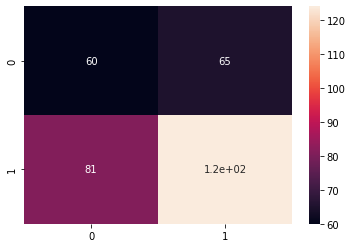

In [ ]:
y_pred=model.predict(x_test)
threshold=0.5
y_pred_threshold=[(1 if val>threshold else 0) for val in y_pred]
y_true=x_test.labels.tolist()
print(confusion_matrix(y_true,y_pred_threshold))
print(accuracy_score(y_true,y_pred_threshold))
sns.heatmap(confusion_matrix(y_true,y_pred_threshold),annot=True)


In [ ]:
y_pred = model.predict(x_test, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
#y_true=x_test.labels.tolist()



print(classification_report(y_true, y_pred_bool))

print(confusion_matrix(y_true, y_pred=y_pred_bool))

11/11 [==============================] - 6s 520ms/step
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       125
           1       0.00      0.00      0.00       205

    accuracy                           0.38       330
   macro avg       0.19      0.50      0.27       330
weighted avg       0.14      0.38      0.21       330

[[125   0]
 [205   0]]


In [ ]:
print(classification_report(y_true, y_pred_bool))

In [ ]:
keys=history.history.keys()
print(keys)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


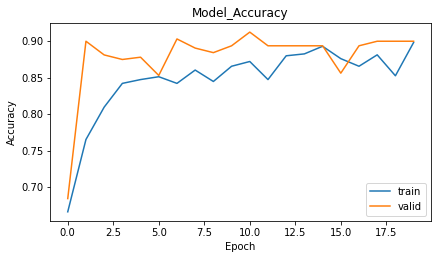

In [ ]:
plt.figure(1,figsize=(15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'])

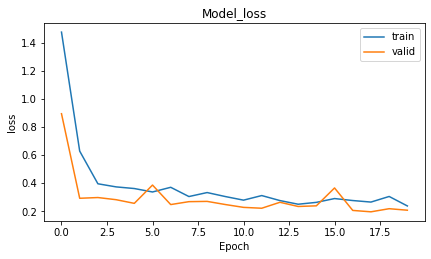

In [ ]:
plt.figure(1,figsize=(15,8))
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])

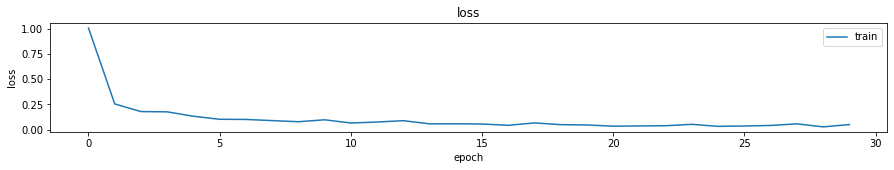

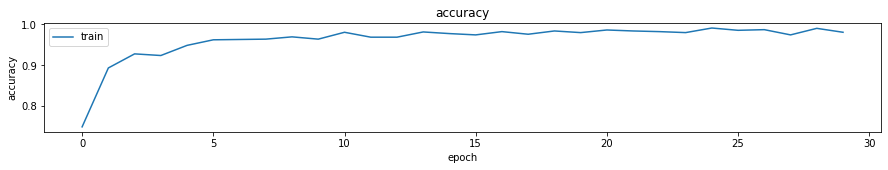

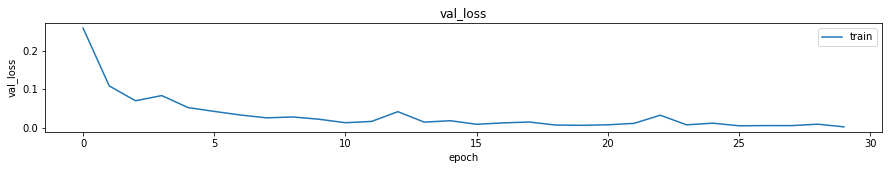

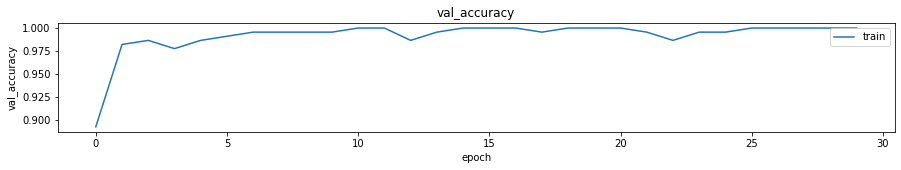

In [ ]:
for key in keys:
  plt.figure(figsize=(15,2))
  plt.plot(history.history[key])
  plt.title(key)
  plt.ylabel(key)
  plt.xlabel('epoch')
  plt.legend(['train','valid'])

In [ ]:
model.save("best.hdf5")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
model=load_model('/content/best.hdf5')

In [ ]:
from keras.preprocessing import image
import cv2
import numpy as np
import PIL
from PIL import Image

In [ ]:
img = image.load_img('/content/drive/MyDrive/Data/Malignant cases/Malignant case (104).jpg',
                    target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
pred = model.predict(x)
pred

array([[1.]], dtype=float32)

In [ ]:
class_names=["Bengin cases","Malignant cases"]
prediction = class_names[int(pred[0][0])]
print(pred[0][0])
print(prediction)

1.0
Malignant cases


In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('/content/best.hdf5')

# Define a Flask app
app = Flask(__name__)

# Define a route for predicting the uploaded images
@app.route('/predict', methods=['POST'])
def predict():
    # Get the uploaded file from the request
    file = request.files['image']
    
    # Load the image and preprocess it
    img = image.load_img(file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Make a prediction
    preds = model.predict(x)
    
    # Get the class label
    label = decode_predictions(preds, top=1)[0][0][1]
    
    # Return the prediction result
    return jsonify({'class': label})

if __name__ == '__main__':
    app.run(debug=True)